## 2017 Planning for "Streamchik" Online Store

**Project Description:**

Using data from open sources, including historical sales data of games, user and critic ratings, genres, and platforms, I will forecast metrics that show the relationship between parameters and sales volumes. I will also identify patterns in the data that will help in betting on potentially popular products and planning advertising campaigns for the "Streamchik" online store.

In [1]:
# Import all necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st

### Opening the file

In [2]:
# Reading the file
data = pd.read_csv('/datasets/games.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


**Conclusion**

The file was successfully opened. It was noticed that some columns do not match their expected data types, such as `User_Score`, which we will investigate further. Additionally, all column names are in uppercase, which needs to be corrected.

### Preparing the file

In [4]:
# Rename the columns
data.columns = data.columns.str.lower()

In [5]:
# Searching for duplicates
display(data['year_of_release'].unique())
display(data['genre'].unique())
display(data['critic_score'].unique())
display(data['user_score'].unique())
display(data['rating'].unique())

array([2006., 1985., 2008., 2009., 1996., 1989., 1984., 2005., 1999.,
       2007., 2010., 2013., 2004., 1990., 1988., 2002., 2001., 2011.,
       1998., 2015., 2012., 2014., 1992., 1997., 1993., 1994., 1982.,
       2016., 2003., 1986., 2000.,   nan, 1995., 1991., 1981., 1987.,
       1980., 1983.])

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy', nan], dtype=object)

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 35., 41., 36., 28., 31., 27., 26., 19., 23.,
       24., 21., 17., 22., 13.])

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

In [6]:
data.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

In the `user_score` column, we observe the value 'tbd'. In the gaming industry, this abbreviation is used to indicate that a score is not yet available. In our case, this means the user rating was not provided. Therefore, we will replace 'tbd' with NaN.

In [7]:
# Filling Missing Values:
data['user_score'] = data['user_score'].replace('tbd', np.NaN)
data.dropna(subset = ['name', 'year_of_release', 'genre'], inplace = True)
data['rating'] = data['rating'].replace(np.NaN, 'неопределенно')

In [8]:
# Changing Data Types:
data['year_of_release'] = data['year_of_release'].astype(int)
data['user_score'] = data['user_score'].astype(float)

In [9]:
# Sales by All Regions
data['all_sales'] = data[['na_sales','eu_sales','jp_sales', 'other_sales']].sum(axis=1)

**Summary**

We converted all column names to lowercase.

We calculated the number of missing values in each column. Columns with missing values include: name, user_score, critic_score, year_of_release, genre, and rating.

- For `name`, `year_of_release`, and `genre`, the decision was made to drop these columns since the total number of missing values is no more than 273, which is relatively small compared to the overall dataset size of 16,715 rows. Therefore, this deletion will not significantly impact subsequent analysis.
- For `rating`, all NaN values were replaced with 'unknown'.
- `user_score` and `critic_score` were left unchanged.

### Exploratory Data Analysis (EDA)

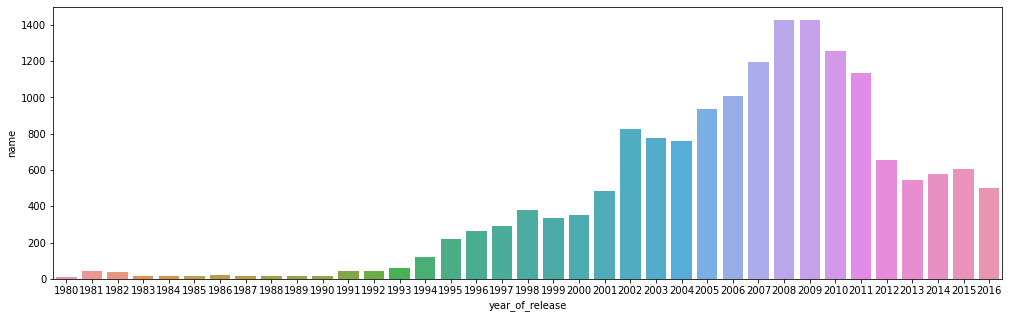

In [10]:
# How many games were released in different years:
count_games_2 = data.groupby('year_of_release')['name'].count().reset_index()
fig, ax = plt.subplots(figsize=(17, 5))
sns.barplot(x=count_games_2['year_of_release'], y=count_games_2['name'], ax=ax);

**Conclusion:**

We see that the first games appeared and gained popularity until 2008. In 2008, we observe a peak in the industry, followed by a decline. The decline can be attributed to the fact that game development became more serious: new technologies were used, and the number of developers working on a single game increased. All of this increased the time and quality of the product but decreased the number of releases.

In [11]:
# To determine the relevance of platform popularity, we will consider the period from 2014 to 2016:
data_part = data.query("2014 <= year_of_release <= 2016")
# Определяем самые популярные платформы:
data_part.groupby(['platform'])['na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'all_sales']\
    .sum()\
    .sort_values(by='all_sales', ascending=False)

/tmp/ipykernel_228/300529301.py:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  data_part.groupby(['platform'])['na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'all_sales']\


,na_sales,eu_sales,jp_sales,other_sales,all_sales
platform,,,,,
PS4,98.61,130.04,15.02,44.48,288.15
XOne,81.27,46.25,0.32,12.52,140.36
3DS,22.64,16.12,44.24,3.68,86.68
PS3,22.05,25.54,11.22,9.37,68.18
X360,28.30,15.49,0.08,4.35,48.22
WiiU,19.36,13.15,7.31,3.16,42.98
PC,7.23,17.97,0.00,1.85,27.05
PSV,2.52,3.53,14.54,1.81,22.40
Wii,2.08,2.59,0.00,0.40,5.07


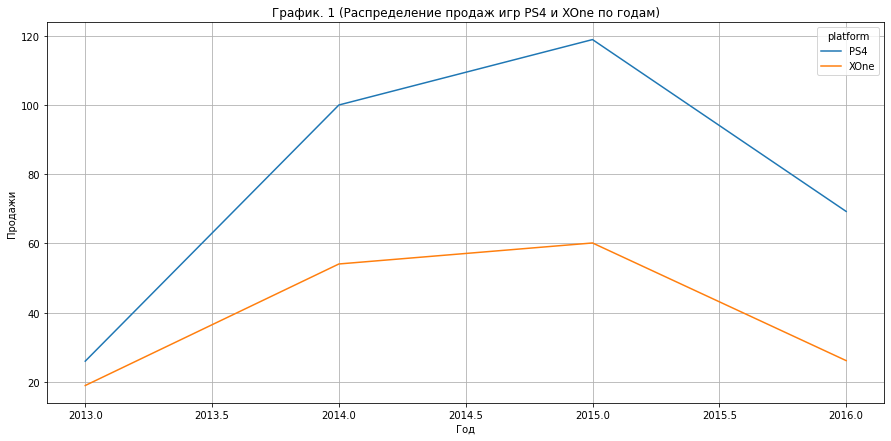

In [12]:
# Plotting the distribution by year
data[data['platform'].isin(['PS4', 'XOne'])].pivot_table(index='year_of_release', columns = 'platform', values='all_sales', aggfunc='sum').plot(grid=True, figsize=(15, 7))
plt.title('График. 1 (Распределение продаж игр PS4 и XOne по годам)')
plt.xlabel('Год')
plt.ylabel('Продажи')
plt.show()

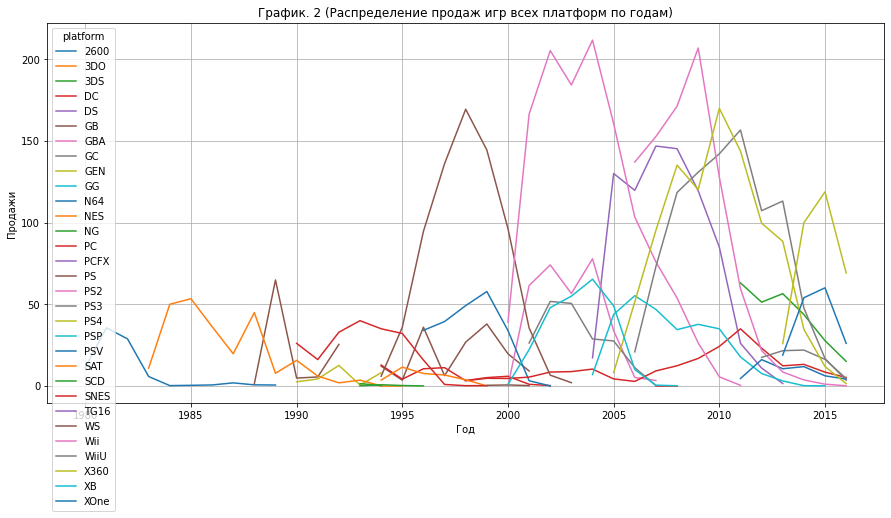

In [13]:
data.pivot_table(index='year_of_release', columns = 'platform', values='all_sales', aggfunc='sum').plot(grid=True, figsize=(15, 7))
plt.title('График. 2 (Распределение продаж игр всех платформ по годам)')
plt.xlabel('Год')
plt.ylabel('Продажи')
plt.show()

**Findings**

By analyzing the data from 2014 to 2016, I grouped the data by platforms and summed up all parameters. After sorting, I identified the two most popular platforms: PS4 and XOne.

From Graph 1, we observe a growth in sales for both platforms, followed by a simultaneous decline in sales in 2015.

Graph 2 reveals that approximately every 1-2 years, an old platform disappears, and a new one emerges in its place. Therefore, I will consider the period from 2014 to 2016 as the most relevant for analysis.

In [14]:
# Choosing the Most Promising Platforms:
data_part_1 = data.query('platform == "PS4" or platform == "XOne"')

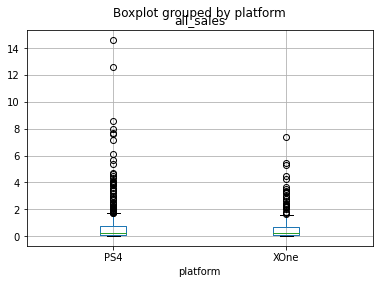

In [15]:
# Boxplot Construction for Relevant Platforms:
data_part_1.boxplot(column='all_sales', by='platform')
plt.show()

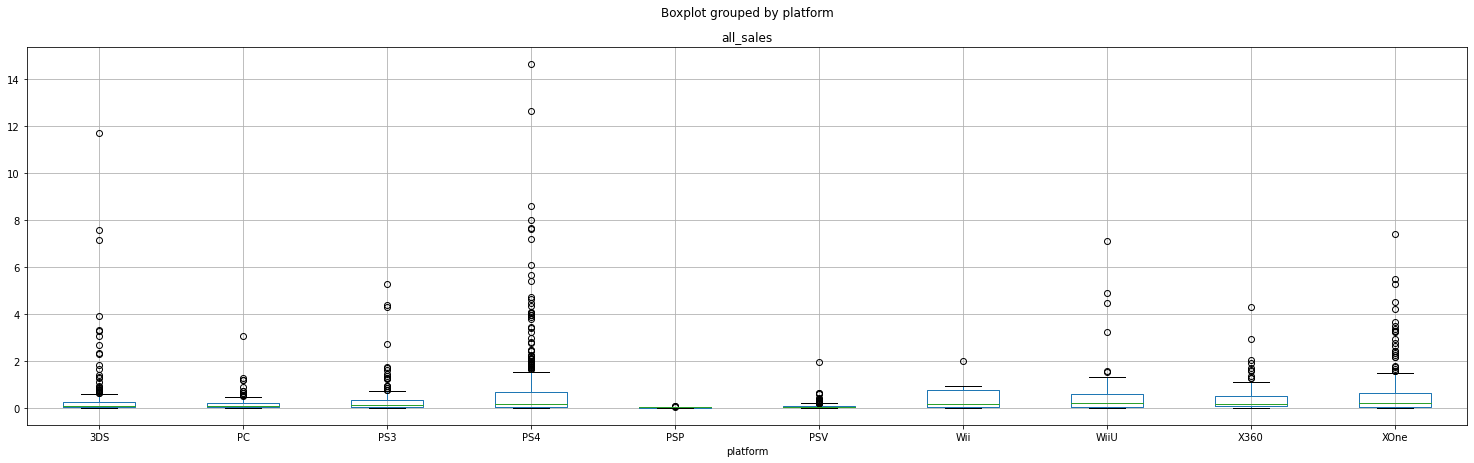

In [16]:
data_part.boxplot(column='all_sales', by='platform', figsize=(25,7))
plt.show()

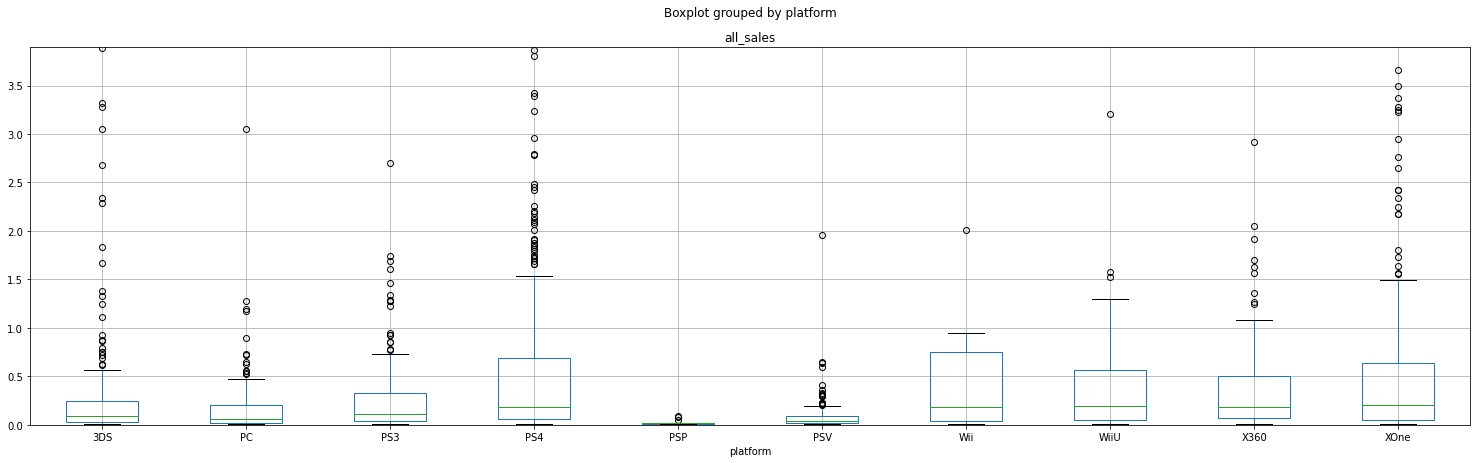

In [17]:
# Narrowing the Range to 3.9 Million Sales for Detailed Analysis
data_part.boxplot(column='all_sales', by='platform', figsize=(25,7))
plt.ylim(0, 3.9)
plt.show()

**Conclusion**

The quartiles and confidence intervals for PS4 and XOne are roughly at the same level, but the values beyond the confidence intervals differ. The range for PS4 is significantly higher than for XOne, and peak values are much higher as well. This may indicate that exclusives on this platform achieve unusually high sales figures.

Among the two platforms, PS4 appears to be the more promising option.

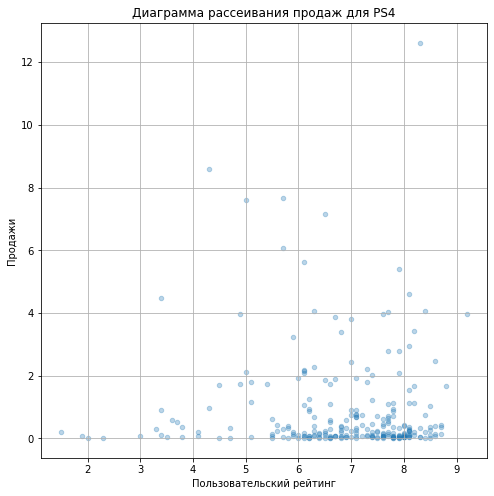

In [18]:
# Scatter Plot for User Reviews for PS4
data_part[data_part['platform']=='PS4'].plot(x='user_score', y='all_sales', kind='scatter', alpha=0.3, figsize=(8,8), grid=True)
plt.xlabel('Пользовательский рейтинг')
plt.ylabel('Продажи')
plt.title('Диаграмма рассеивания продаж для PS4')
plt.show()

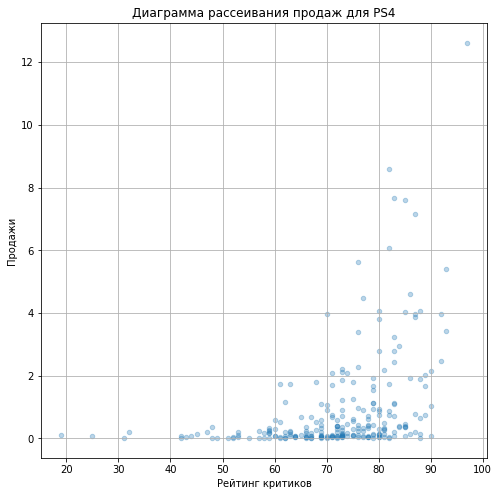

In [19]:
# Scatter Plot for Critic Reviews for PS4
data_part[data_part['platform']=='PS4'].plot(x='critic_score', y='all_sales', kind='scatter', alpha=0.3, figsize=(8,8), grid=True)
plt.xlabel('Рейтинг критиков')
plt.ylabel('Продажи')
plt.title('Диаграмма рассеивания продаж для PS4')
plt.show()

In [20]:
data_ps4 = data_part[data_part['platform']=='PS4']
print(data_ps4['user_score'].corr(data_ps4['all_sales']))

-0.040131589472697356


In [21]:
print(data_ps4['critic_score'].corr(data_ps4['all_sales']))

0.40266141068104083


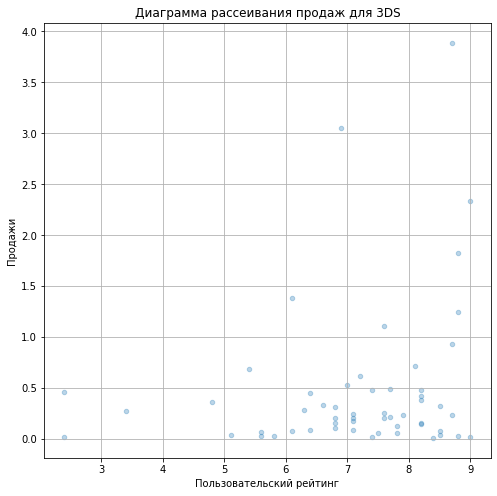

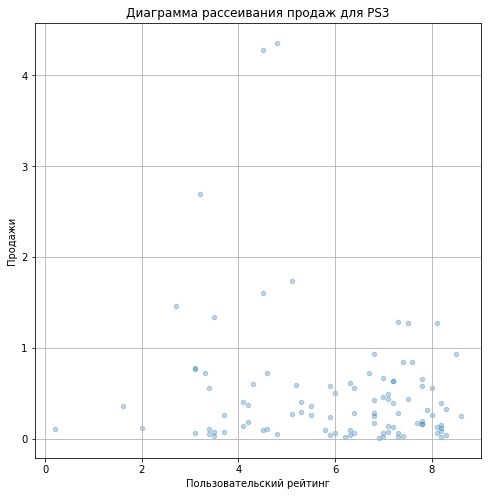

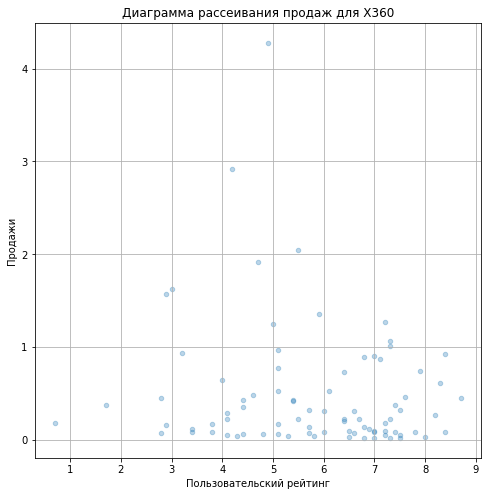

In [22]:
for i in ['3DS', 'PS3', 'X360']:
    data_part[data_part['platform']== i].plot(x='user_score', y='all_sales', kind='scatter', alpha=0.3, figsize=(8,8), grid=True)
    plt.xlabel('Пользовательский рейтинг')
    plt.ylabel('Продажи')
    plt.title('Диаграмма рассеивания продаж для {}'.format(i))
    plt.show()

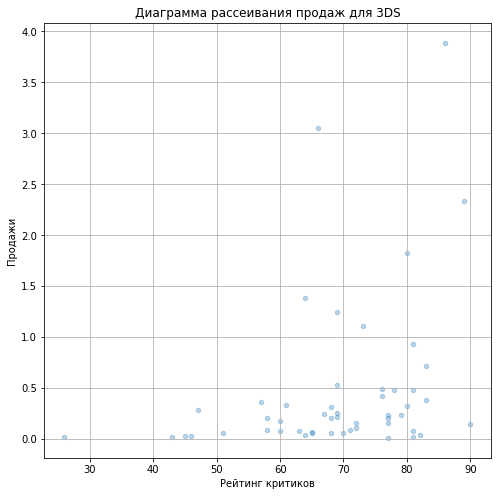

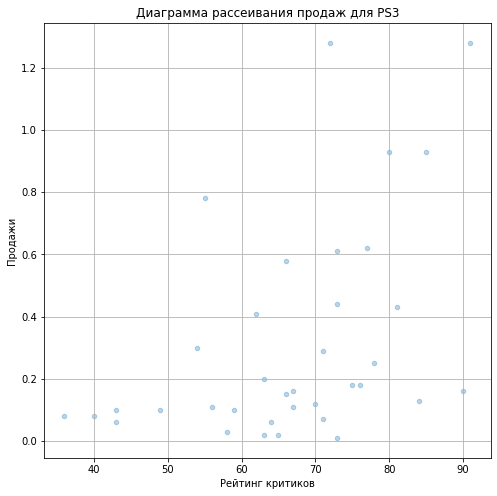

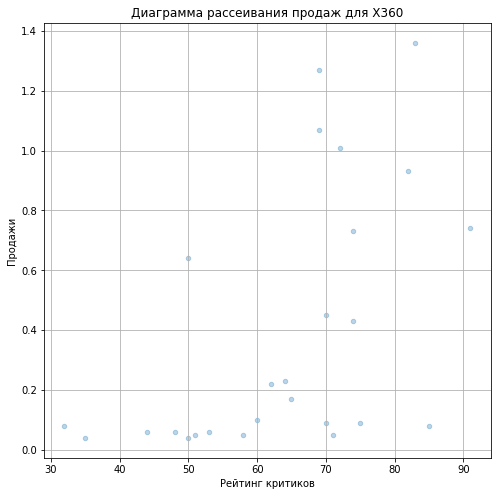

In [23]:
for i in ['3DS', 'PS3', 'X360']:
    data_part[data_part['platform']== i].plot(x='critic_score', y='all_sales', kind='scatter', alpha=0.3, figsize=(8,8), grid=True)
    plt.xlabel('Рейтинг критиков')
    plt.ylabel('Продажи')
    plt.title('Диаграмма рассеивания продаж для {}'.format(i))
    plt.show()

In [24]:
for i in ['3DS', 'PS3', 'X360']:
    a = data_part[data_part['platform']== i]
    print('Корреляци пользовательских рейтингов:', i)
    print(a['user_score'].corr(a['all_sales']))

Корреляци пользовательских рейтингов: 3DS
0.2151932718527028
Корреляци пользовательских рейтингов: PS3
-0.16676141347662118
Корреляци пользовательских рейтингов: X360
-0.138444570945665


In [25]:
for i in ['3DS', 'PS3', 'X360']:
    a = data_part[data_part['platform']== i]
    print('Рейтинг критиков:', i)
    print(a['critic_score'].corr(a['all_sales']))

Рейтинг критиков: 3DS
0.314117492869051
Рейтинг критиков: PS3
0.44657460493190704
Рейтинг критиков: X360
0.5257228356581523


**Conclusion**

- The relationship between user ratings and sales is very weak and negative. The correlation coefficient is so low that it's more accurate to say that there is no significant relationship.
- The relationship between critic reviews and sales is positive but still low. While the relationship is not strong, it is not negligible either.

In [26]:
# Distribution of Games by Genre for the Relevant Period
data_dist = data_part.pivot_table(index='genre', values='all_sales', aggfunc='median')\
    .reset_index()\
    .sort_values('all_sales', ascending=False)
data_dist

,genre,all_sales
8,Shooter,0.515
10,Sports,0.180
4,Platform,0.140
2,Fighting,0.125
7,Role-Playing,0.110
9,Simulation,0.100
0,Action,0.090
3,Misc,0.090
6,Racing,0.090
11,Strategy,0.060


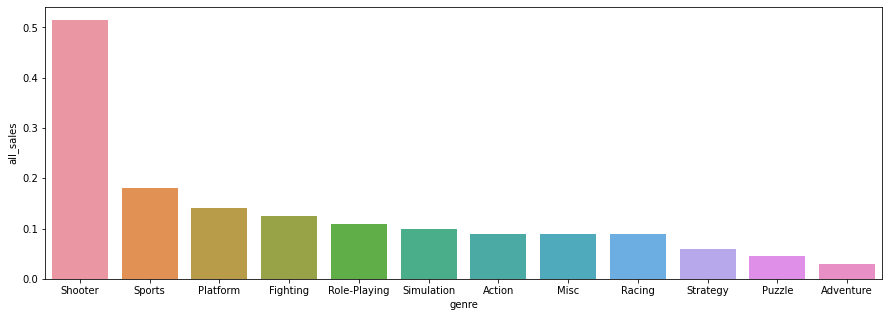

In [27]:
fig, ax = plt.subplots(figsize=(15, 5))
sns.barplot(x=data_dist['genre'], y=data_dist['all_sales'], ax=ax);

**Conclusion**

The top five most popular genres include: shooters, sports games, role-playing games, platformers, and simulators. However, it is worth noting that the difference between the most popular genre—shooters—and all other genres is colossal.

### User Profiles for Different Regions

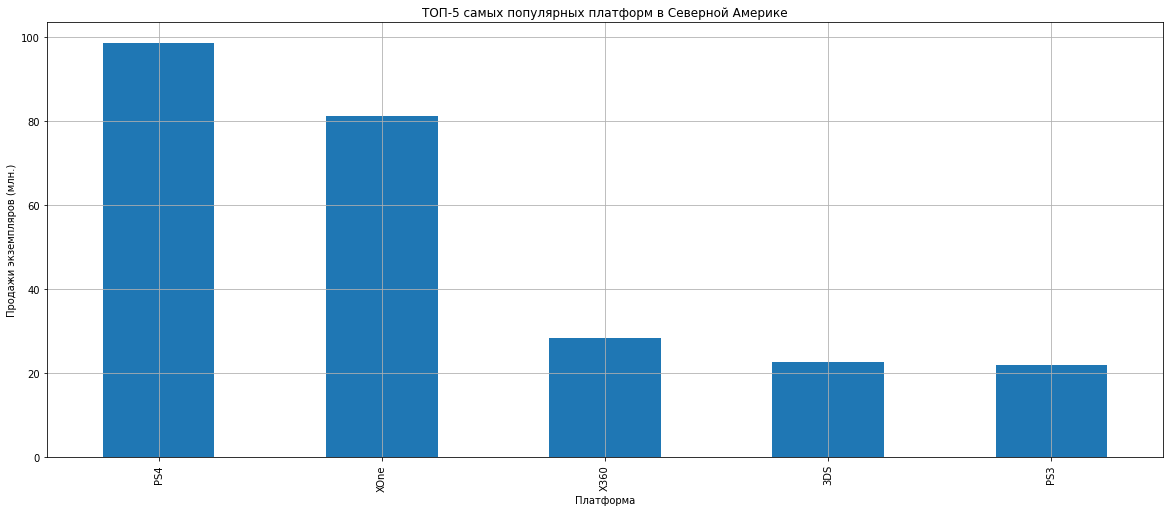

In [28]:
# Top 5 Most Popular Platforms in North America Based on the Overall Table
# Grouping by Platform
platform_na_all = data_part.groupby('platform')['na_sales'].sum().sort_values(ascending=False).head(5)

platform_na_all.plot(x = 'platform', y = 'na_sales', kind = 'bar', figsize=(20,8), grid=True, title = 'ТОП-5 самых популярных платформ в Северной Америке')

plt.xlabel('Платформа')

plt.ylabel('Продажи экземпляров (млн.)')
plt.show()

**Conclusion**

The top 5 platforms by descending sales in North America are:
- PS4
- XOne
- 3DS
- WiiU
- X360

It's worth noting that, among all markets, XOne shows the highest values in North America, as it is a local brand.

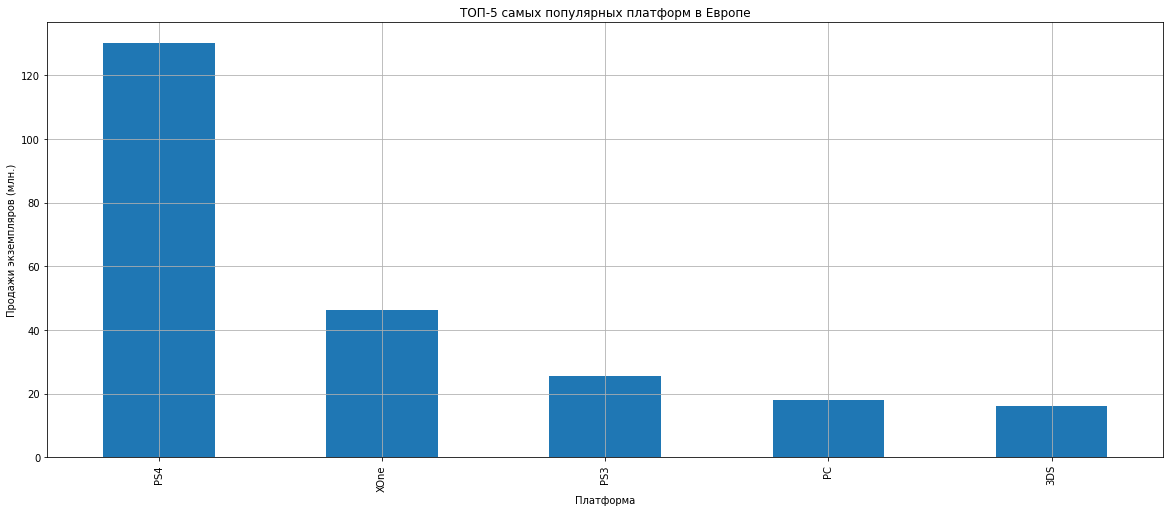

In [29]:
# Top 5 Most Popular Platforms in Europe by Overall Sales
# Group by platform
platform_eu_all = data_part.groupby('platform')['eu_sales'].sum().sort_values(ascending=False).head(5)

platform_eu_all.plot(x = 'platform', y = 'eu_sales', kind = 'bar', figsize=(20,8), grid=True, title = 'ТОП-5 самых популярных платформ в Европе')

plt.xlabel('Платформа')

plt.ylabel('Продажи экземпляров (млн.)')
plt.show()

**Conclusion**

The top 5 platforms, ranked by descending game sales, are:
- PS4
- XOne
- PS3
- PC
- 3DS

It is worth noting that PC is the only platform in the top five in the European market.

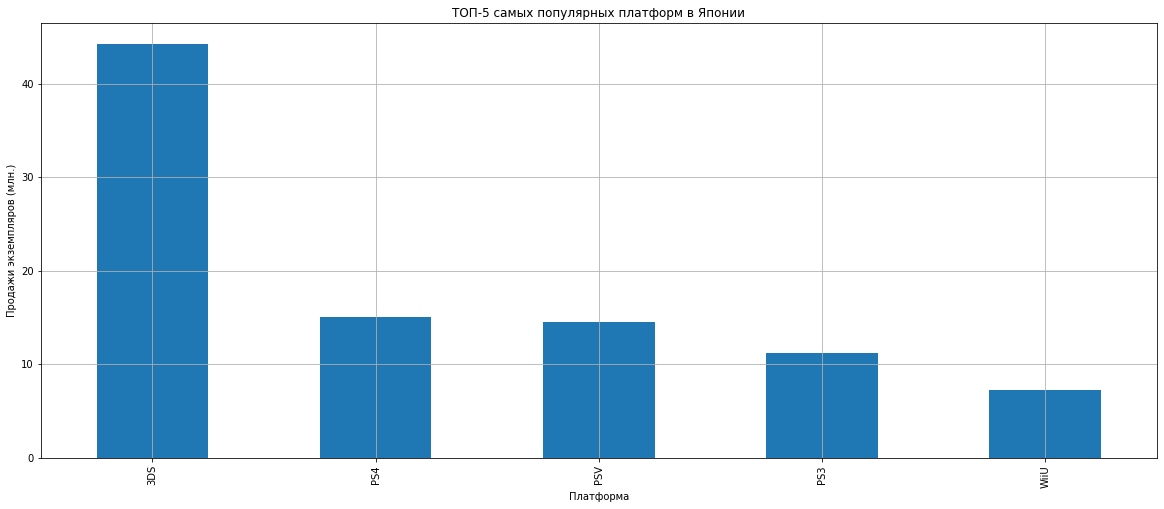

In [30]:
# Top 5 Most Popular Platforms in Japan by Overall Table
# Group by platform
platform_jp_all = data_part.groupby('platform')['jp_sales'].sum().sort_values(ascending=False).head(5)

platform_jp_all.plot(x = 'platform',
                     y = 'jp_sales', kind = 'bar', 
                     figsize=(20,8), 
                     grid=True, 
                     title = 'ТОП-5 самых популярных платформ в Японии')

plt.xlabel('Платформа')

plt.ylabel('Продажи экземпляров (млн.)')
plt.show()

**Conclusion**

The top 5 platforms, ordered by descending game sales, are:
- 3DS
- PS4
- PSV
- PS3
- WiiU

A notable feature is the strong demand for portable consoles in this region. Three portable consoles (3DS, PSV, WiiU) have made it into the top 5.

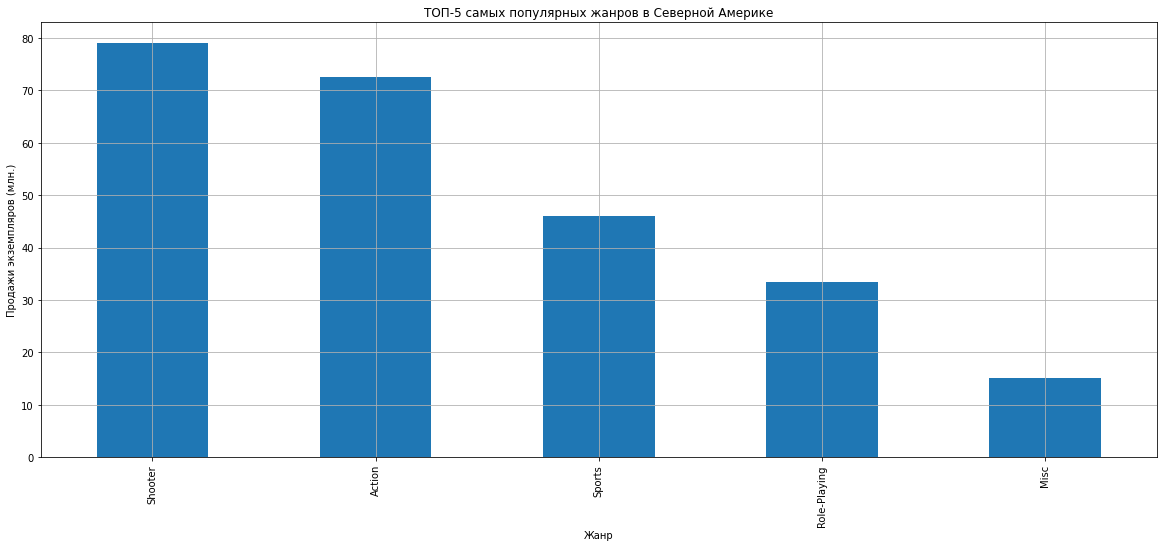

In [31]:
genre_na = data_part.groupby('genre')['na_sales'].sum().sort_values(ascending=False).head(5)

genre_na.plot(x = 'genre', y = 'na_sales', kind = 'bar', figsize=(20,8), grid=True, title = 'ТОП-5 самых популярных жанров в Северной Америке')

plt.xlabel('Жанр')

plt.ylabel('Продажи экземпляров (млн.)')
plt.show()

**Conclusion**

The top 5 genres by descending sales are:
- Shooter
- Action
- Sports
- Role-Playing
- Misc

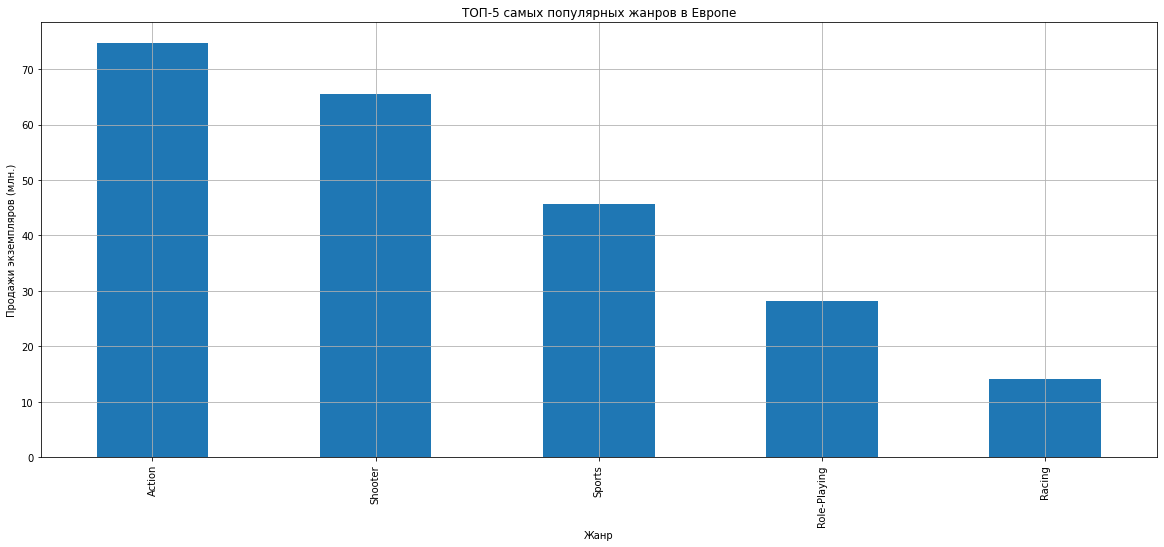

In [32]:
# Top 5 Most Popular Genres in Europe by Overall Table
# Group by Genre
genre_eu = data_part.groupby('genre')['eu_sales'].sum().sort_values(ascending=False).head(5)

genre_eu.plot(x = 'genre', y = 'eu_sales', kind = 'bar', figsize=(20,8), grid=True, title = 'ТОП-5 самых популярных жанров в Европе')

plt.xlabel('Жанр')

plt.ylabel('Продажи экземпляров (млн.)')
plt.show()

**Conclusion**

The top five genres by sales, in descending order, are:
- Action
- Shooter
- Sports
- Role-Playing
- Racing

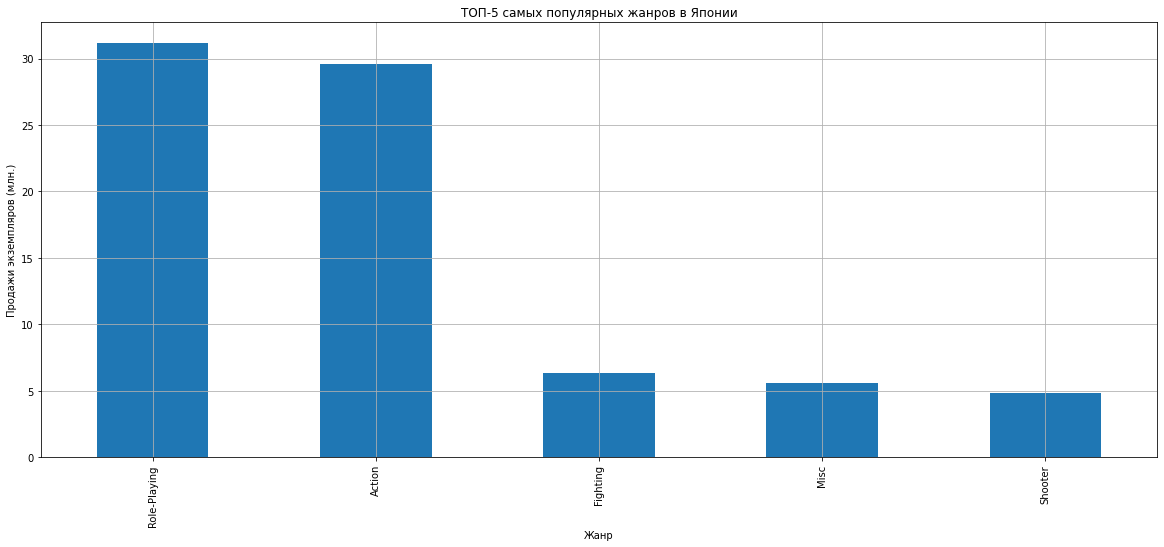

In [33]:
# Top 5 Most Popular Genres in Japan by Overall Table
# Grouping by Genre
genre_jp = data_part.groupby('genre')['jp_sales'].sum().sort_values(ascending=False).head(5)

genre_jp.plot(x = 'genre', y = 'jp_sales', kind = 'bar', figsize=(20,8), grid=True, title = 'ТОП-5 самых популярных жанров в Японии')

plt.xlabel('Жанр')

plt.ylabel('Продажи экземпляров (млн.)')
plt.show()

**Conclusion**

The top 5 genres by sales in descending order are:
- Role-Playing
- Action
- Fighting
- Misc
- Shooter

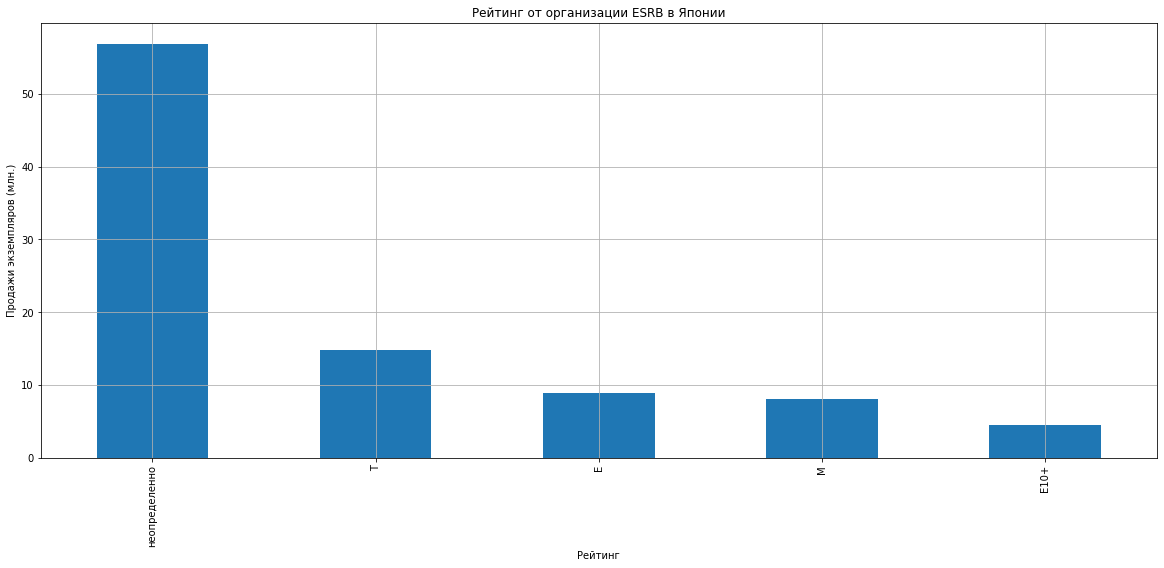

In [34]:
# ESRB Rating in Japan
# Grouping by genres
rating_jp = data_part.groupby('rating')['jp_sales'].sum().sort_values(ascending=False)

rating_jp.plot(x = 'rating', y = 'jp_sales', kind = 'bar', figsize=(20,8), grid=True, title = 'Рейтинг от организации ESRB в Японии')

plt.xlabel('Рейтинг')

plt.ylabel('Продажи экземпляров (млн.)')
plt.show()

**Conclusion**

In Japan, games with the "Rating Pending" label sell more frequently, but we will disregard this fact as it is not indicative. Therefore, the most popular rating is T (Teen).

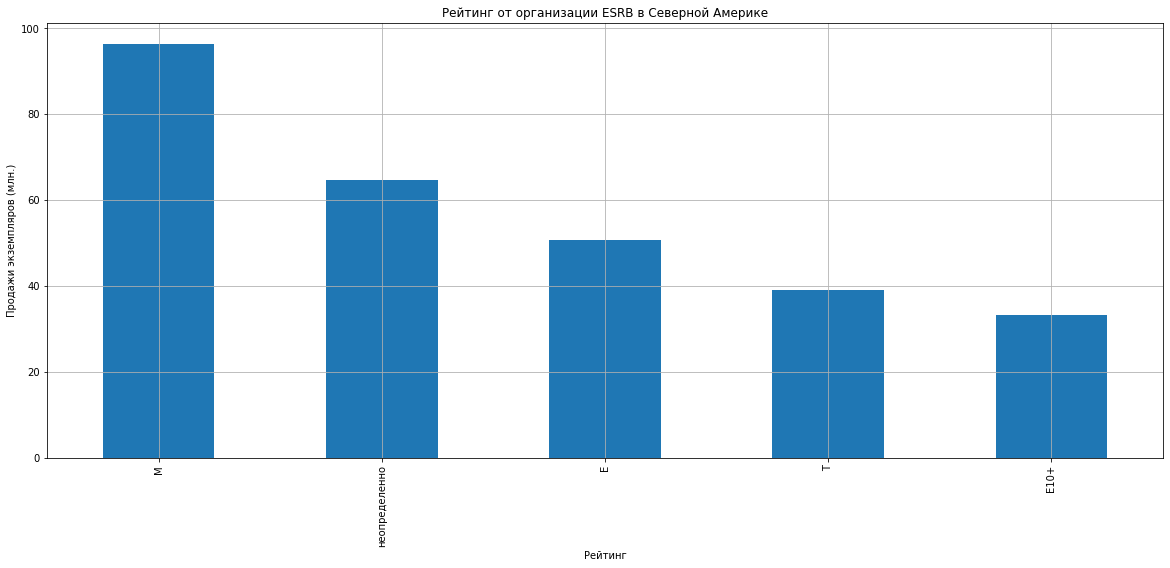

In [35]:
# Rating by ESRB in North America  
# Grouping by Genres
rating_na = data_part.groupby('rating')['na_sales'].sum().sort_values(ascending=False)

rating_na.plot(x = 'rating', y = 'na_sales', kind = 'bar', figsize=(20,8), grid=True, title = 'Рейтинг от организации ESRB в Северной Америке')

plt.xlabel('Рейтинг')

plt.ylabel('Продажи экземпляров (млн.)')
plt.show()

**Conclusion**

In North America, games with an ESRB rating of M (Mature) are sold more frequently.

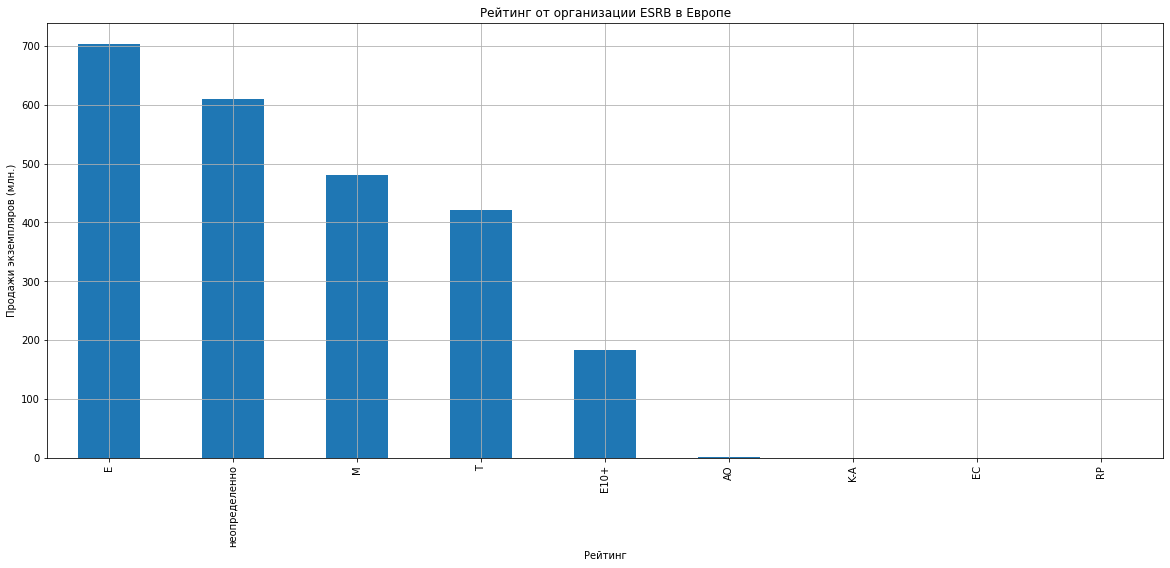

In [36]:
# ESRB Ratings in Europe
# Group by genre
rating_eu = data.groupby('rating')['eu_sales'].sum().sort_values(ascending=False)

rating_eu.plot(x = 'rating', y = 'eu_sales', kind = 'bar', figsize=(20,8), grid=True, title = 'Рейтинг от организации ESRB в Европе')

plt.xlabel('Рейтинг')

plt.ylabel('Продажи экземпляров (млн.)')
plt.show()

**Conclusion**

In Europe, games with an ESRB rating of E (Everyone) sell more frequently.

**Conclusion**

**North America:**

- **Popular Platforms:**
  - PS4
  - XOne
  - 3DS
  - WiiU
  - X360

- **Popular Genres:**
  - Shooter
  - Action
  - Sports
  - Role-Playing
  - Misc

- **Popular Age Rating:**
  - M (Mature)

**Europe:**

- **Popular Platforms:**
  - PS4
  - XOne
  - PS3
  - PC
  - 3DS

- **Popular Genres:**
  - Action
  - Shooter
  - Sports
  - Role-Playing
  - Racing

- **Popular Age Rating:**
  - E (Everyone)

**Japan:**

- **Popular Platforms:**
  - 3DS
  - PS4
  - PSV
  - PS3
  - WiiU

- **Popular Genres:**
  - Role-Playing
  - Action
  - Fighting
  - Misc
  - Shooter

- **Popular Age Rating:**
  - T (Teen)

### Hypothesis Testing

#### Hypothesis 1: The average user ratings for Xbox One and PC platforms are the same.

**H0: The average user ratings (user_score) for Xbox One and PC platforms are the same.**

**H1: The average user ratings (user_score) for Xbox One and PC platforms are different.**

In [37]:
data_part.reset_index(drop=True)

data_xbox = data_part[data_part['platform'] == 'XOne']
data_pc = data_part[data_part['platform'] == 'PC']

xbox_1 = data_xbox['user_score'].dropna()
pc_1 = data_pc['user_score'].dropna()
alpha = .05
results = st.ttest_ind(
xbox_1,
pc_1, equal_var = True)
print('p-значение:', results.pvalue)
if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.10450507919348415
Не получилось отвергнуть нулевую гипотезу


**Conclusion**

We were unable to reject the null hypothesis (p-value ~ 0.14), so we can assume that the average user ratings for games on the Xbox One and PC platforms are similar.

#### Second Hypothesis: The average user ratings for the genres Action and Sports are different.

**Null Hypothesis (H0)**: The average user ratings (user_score) for the Action and Sports genres are equal.

**Alternative Hypothesis (H1)**: The average user ratings (user_score) for the Action and Sports genres are different.

In [38]:
data_action = data_part[data_part['genre'] == 'Action']
data_sports = data_part[data_part['genre'] == 'Sports']
action_1 = data_action['user_score'].dropna()
sports_1 = data_sports['user_score'].dropna()
alpha = .05
results = st.ttest_ind(
action_1,
sports_1)
print('p-значение: ', results.pvalue)
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение:  2.8711147985105864e-19
Отвергаем нулевую гипотезу


**Conclusion**

We failed to reject the null hypothesis. Therefore, we can assume that the average user ratings for games in the Action and Sports genres are similar.

**Conclusion**

**Formulation of Hypotheses:**
- The null hypothesis should not include values from the alternative hypothesis, and vice versa.
- Since we are testing the null hypothesis using a T-test, it is formulated as the equality of two means, as the T-test itself checks for the equality of two means.

**Criterion:**
- T-test for comparing the means of two populations.

**Why It Was Used:**
- We are dealing with two populations.
- We need to compare their means.

**Hypothesis Testing Results:**

- **For Xbox One and PC Platforms:**
  - We failed to reject the null hypothesis (p-value ~ 0.14). Therefore, we can assume that the average user ratings for games on Xbox One and PC platforms are similar.

- **For Action and Sports Genres:**
  - We rejected the null hypothesis. Thus, we can conclude that the average user ratings for games in the Action and Sports genres are different.

### Overall Conclusion

**Data Preparation Summary:**

- All column names have been converted to lowercase.
- Missing values have been handled as follows:
  - For the columns `name`, `year_of_release`, and `genre`: We decided to delete these rows as the total number of missing values is only 273, which is very small compared to the total dataset size of 16,715 rows. Therefore, removing these rows will not significantly impact the subsequent analysis.
  - For `user_score` and `critic_score`: Missing values were filled with the median values of these columns.
  - For `rating`: No logical method was found to impute missing values. Removing rows with missing values would significantly alter the dataset, so the decision was made to leave these missing values as they are.

####  Exploratory Data Analysis

**Summary:**

- **Trend Over Time:** There is a noticeable decline in the number of new games released each year, which is attributed to the increasing time required for game development.

- **Relevant Period (2014 - 2016):** During this period, the leading platforms are PS4 and XOne. It is observed that older platforms tend to phase out approximately every year, while new ones emerge. Sales trends for games across all platforms show a tendency to decline.

- **Platform Analysis:**
  - Among the two leading platforms, PS4 is considered the most promising. PS4 games are often exclusive and frequently achieve peak sales, more so than XOne.
  - The relationship between user ratings and game sales on PS4 is too weak to be considered significant.
  - There is a weak but direct correlation between critic ratings and game sales on PS4, indicating some degree of influence.

- **Platform Performance:** All platforms lag behind PS4 and XOne, except for 3DS, which thrives primarily due to the Asian market.

- **Popular Genres:** The top five genres across all platforms are shooters, sports games, role-playing games, platformers, and simulators. Notably, the difference in sales between the most popular genre (shooters) and the others is substantial.

#### User Profiles by Region

**North America:**

Popular Platforms:
- PS4
- XOne
- 3DS
- WiiU
- X360

Popular Genres:
- Shooter
- Action
- Sports
- Role-Playing
- Misc

Popular Age Rating:
- M

**Europe:**

Popular Platforms:
- PS4
- XOne
- PC
- 3DS
- PS3

Popular Genres:
- Action
- Shooter
- Sports
- Role-Playing
- Racing

Popular Age Rating:
- E

**Japan:**

Popular Platforms:
- 3DS
- PS4
- PSV
- PS3
- WiiU

Popular Genres:
- Role-Playing
- Action
- Fighting
- Misc
- Shooter

Popular Age Rating:
- T

#### Hypothesis Testing

**The average user ratings for Xbox One and PC are the same.**

H0: The average ratings for Xbox One and PC are equal.

H1: The average ratings for Xbox One and PC are different.

We failed to reject the null hypothesis (p-value ~ 0.13), so we can assume that the user ratings for games on these two platforms are similar.

**The average user ratings for the genres Action and Sports are different.**

H0: The average ratings for the Action genre are equal to those for the Sports genre.

H1: The average ratings for the Action genre are different from those for the Sports genre.

We were able to reject the null hypothesis (p-value ~ 3.31e-25), so we can assume that the user ratings for games in these two genres are different.